# Basic Statistics

Joshua Min

## 1. Introduction

This dataset contains information on transactions and whether or not that transaction is fraud or not. 

I found this dataset very interesting and I believe that a lot of others would as well. This is becuase the dataset contains a column called isFlaggedFraud, and this is interesting becuase we can then compare our model accuracy to that of the is flagged section. We can basically compare our model to the model within the dataset.

1. Which payment type is used most for committing fraud?

2. I am interested if there is a relationship between the average amount of money and the type of payment used. Would transfer and cashout be the highest in amount?

3. Is there a relationship between the amount of money and the amount of hours it is processed, type of transaction, whether or not it is fraud, and the balance before the transaction? What feature fluctuates the amount of money most?

4. Is there a linear relationship between fradulent transactions and the amount of money used, the amount of hours it is processed, type of transaction, and the balance after the transaction? Which of these features made a transaction seem more fradulent?

I found these research questions interesting because I was curious as to how one can tell when a transaction is fradulent. We can also learn the most important tells of fradulent transactions and avoid them, like scams. 

These research questions will help me discern what features are most important in differentiating was is fraud and not. 

In [37]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
df = pd.read_csv('fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [39]:
df.isFlaggedFraud.unique()

array([0, 1])

In [40]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [41]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [42]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [43]:
df = df.sample(100000, ignore_index=True)

In [44]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,323,CASH_IN,426720.87,C1803835108,4299428.01,4726148.88,C858920664,662895.38,236174.51,0,0
1,252,TRANSFER,908718.17,C1061134126,11098.00,0.00,C1863256855,865872.49,1580792.40,0,0
2,355,CASH_OUT,144021.58,C1111050838,0.00,0.00,C266475859,782790.52,926812.09,0,0
3,130,CASH_OUT,90283.45,C1249177617,165393.00,75109.55,C881249830,0.00,90283.45,0,0
4,400,CASH_OUT,348202.48,C801000088,5066.00,0.00,C411450902,835849.33,1184051.81,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,335,PAYMENT,2731.51,C746856527,11083.00,8351.49,M836558587,0.00,0.00,0,0
99996,165,PAYMENT,3365.15,C973823624,20245.00,16879.85,M99129809,0.00,0.00,0,0
99997,377,CASH_OUT,107395.37,C1182591964,0.00,0.00,C40025636,3863541.57,3970936.94,0,0
99998,41,CASH_OUT,65159.18,C299849883,0.00,0.00,C2054727963,1844750.70,1909909.88,0,0


## 2. Descriptive Analytics

I would like to see the relationships between the amount, whether or not it is fraud, and the type of payement. I would have wanted to include whether or not the payment was flagged as fraud, but after a closer look at the dataset, there is less than 1 percent that were flagged as fraud.

Research Question: Which payment type is used most for committing fraud?

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

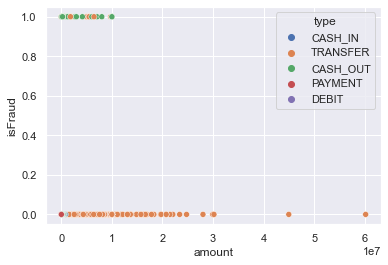

In [45]:
sns.scatterplot(x='amount', y='isFraud', hue='type', data=df)

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

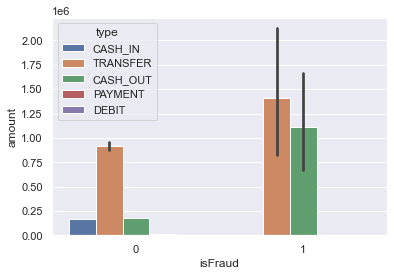

In [46]:
sns.barplot(x='isFraud', y='amount', hue='type', data=df)

In [47]:
df.isFraud.value_counts()

0    99871
1      129
Name: isFraud, dtype: int64

In [48]:
print(127 / len(df))
print(99873 / len(df))

0.00127
0.99873


In [49]:
df.type.value_counts()

CASH_OUT    35391
PAYMENT     33795
CASH_IN     21950
TRANSFER     8253
DEBIT         611
Name: type, dtype: int64

In [50]:
values = [value for value in df.type.value_counts()]
percentages = [value/len(df) for value in df.type.value_counts()]
print(values)
print(percentages)

[35391, 33795, 21950, 8253, 611]
[0.35391, 0.33795, 0.2195, 0.08253, 0.00611]


In [51]:
df[['type', 'isFraud']].groupby('type').mean()

,isFraud
type,
CASH_IN,0.000000
CASH_OUT,0.002119
DEBIT,0.000000
PAYMENT,0.000000
TRANSFER,0.006543


In [52]:
df[['type', 'isFraud']].groupby('type').sum()

,isFraud
type,
CASH_IN,0
CASH_OUT,75
DEBIT,0
PAYMENT,0
TRANSFER,54


We can see here that there are more fraud with transfer payments than cash out payments in percentage while in the data, there are about the same number of fraud happening. We also see very few number of fradulent cases because it makes up less than 1 percent of the data and non fradulent cases make up over 99 percent of the data. This means that if we were to guess that each row would be not fraud on all of the data, we would be correct with an accuracy over 99 percent, but this is just guessing. 

### Conclusion

As we can see there were only two types of payments that were used for fraud. Transfer and Cashouts. However it seems to be more transfers than cash outs.

## 3. Inference

I am interested if there is a relationship between the average amount of money and the type of payment used. Would transfer and cashout be the highest in amount? I will discern this with ANOVA

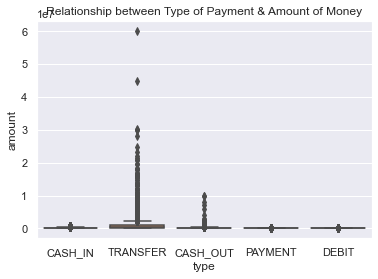

In [53]:

sns.boxplot(x = 'type', y = 'amount', data = df) 
plt.title('Relationship between Type of Payment & Amount of Money') 
plt.show()

In [54]:
results = smf.ols('amount ~ type', data=df).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     4468.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:34:13   Log-Likelihood:            -1.4641e+06
No. Observations:              100000   AIC:                         2.928e+06
Df Residuals:                   99995   BIC:                         2.928e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.677e+05   3728.501     44.985      0.000     1.6e+05    1.75e+05
type[T.CASH_OUT]  8671.0781   4745.920      1.827      0.068    -630.867     1.8e+04
type[T.DEBIT]     -1.62e+05   2.27e+04     -7.149      0.000   -2.06e+05   -1.18e+05
type[T.PAYMENT]  -1.546e+05   4788.626    -32.294      0.000   -1.64e+05   -1.45e+05
type[T.TRANSFER]  7.498e+05   7132.690    105.127      0.000    7.36e+05    7.64e+05
==============================================================================
Omnibus:                   277449.278   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22908939322.050
Skew:                          35.388   Prob(JB):                         0.00
Kurtosis:                    2346.744   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

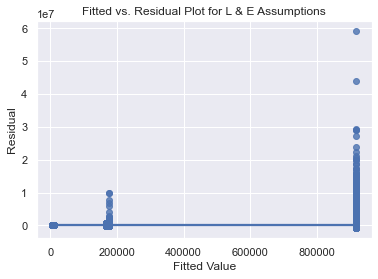

In [55]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual') 
plt.xlabel('Fitted Value') 
plt.title('Fitted vs. Residual Plot for L & E Assumptions') 
plt.show() 

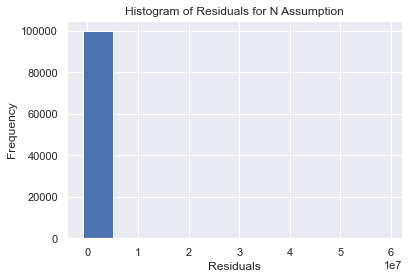

In [56]:
plt.hist(results.resid) 
plt.xlabel('Residuals') 
plt.ylabel('Frequency') 
plt.title('Histogram of Residuals for N Assumption') 
plt.show() 

L - Distribution of points in the first graph is not even around the line so this condition is not met.   
I - no graph, sample size is less than 10 percent of all payments and this is randomly sampled. So this does meet the condition.     
N - residuals don't appear roughly normal and is right skewed, therefore this condition is not met.  
E - points are not evenly scattered in a band for all fitted values, therefore this condition is not met. 
This linear regression model has only one explanatory variable and its categorical so there is no need to check the multicollinearity condition.

There is no multicollinearity condition, as this is simple linear regression with a categorical predictor.  
In general, my assumptions are not met, so I should be careful with the interpretations that I draw from any later inference procedures.

### Hypotheses
$H_o$: $\mu$ = $\mu_{payment}$  
$H_o$: All types of payment are the same when it comes to the amount of money   
$H_a$: $\mu$ = $\mu_{payment}$ + intercept  
$H_a$: At least one of my population means are different from each other

In [57]:
results.summary().tables[0]

Dep. Variable:,amount,R-squared:,0.152
Model:,OLS,Adj. R-squared:,0.152
Method:,Least Squares,F-statistic:,4468.
Date:,"Wed, 04 May 2022",Prob (F-statistic):,0.00
Time:,01:34:13,Log-Likelihood:,-1.4641e+06
No. Observations:,100000,AIC:,2.928e+06
Df Residuals:,99995,BIC:,2.928e+06
Df Model:,4,,
Covariance Type:,nonrobust,,


From the provided output, the test statistic is 3890 & the p‑value is 0.
At a significance level of 0.05, I would have sufficient evidence to reject my null hypothesis.  

Therefore I would conclude that there is enough evidence to suggest that based on the different kinds of payments made, there is a change in the amount of money.

### Conclustion

This helps answer my research queestion because I can now see that tranfer has the most positive impact on amount and cashout is second. I was able to get this information from the coeffecients of the model.

## 4. Linear Regression

### Research Question

Is there a relationship between the amount of money and the amount of hours it is processed, type of transaction, whether or not it is fraud, and the balance before the transaction? What feature fluctuates the amount of money most?

In [58]:
results = smf.ols('amount ~ step+type+isFraud+oldbalanceOrg', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2602.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:34:13   Log-Likelihood:            -1.4639e+06
No. Observations:              100000   AIC:                         2.928e+06
Df Residuals:                   99992   BIC:                         2.928e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.459e+05   5415.391     26.943      0.000    1.35e+05    1.57e+05
type[T.CASH_OUT]  6936.8354   5361.311      1.294      0.196   -3571.268    1.74e+04
type[T.DEBIT]    -1.626e+05   2.28e+04     -7.144      0.000   -2.07e+05   -1.18e+05
type[T.PAYMENT]   -1.55e+05   5389.094    -28.763      0.000   -1.66e+05   -1.44e+05
type[T.TRANSFER]  7.445e+05   7556.816     98.522      0.000     7.3e+05    7.59e+05
step                90.9276     12.276      7.407      0.000      66.866     114.989
isFraud           7.365e+05   4.87e+04     15.121      0.000    6.41e+05    8.32e+05
oldbalanceOrg    -7.536e-05      0.001     -0.107      0.915      -0.001       0.001
==============================================================================
Omnibus:                   277647.023   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      23151392134.834
Skew:                          35.452   Prob(JB):                         0.00
Kurtosis:                    2359.121   Cond. No.                     8.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{Amount}$ = 1.476e+05 + 5464.3096 $* Cashout$ + -1.645e+05 $* Debit$ + -1.565e+05 $* Payment$ + 7.28e+05 $* Transfer$ + 89.8813 $* Step$ + 7.116e+05 $* isFraud$ + 0.0001 $* oldbalanceOrg$

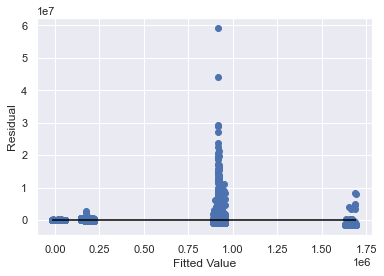

In [59]:
plt.scatter(results.fittedvalues, results.resid) 
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues), color='black')
plt.ylabel('Residual') 
plt.xlabel('Fitted Value') 
plt.show() 

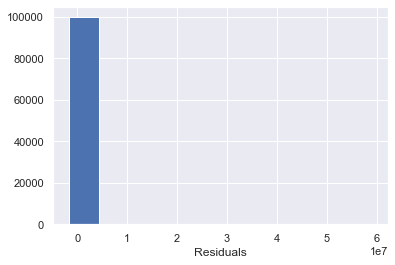

In [60]:
plt.hist(results.resid) 
plt.xlabel('Residuals') 
plt.show()

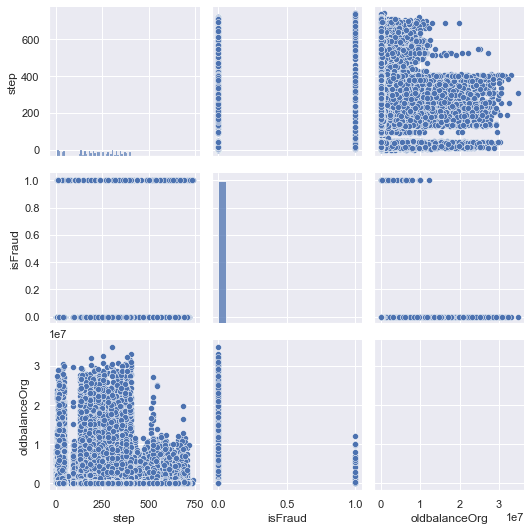

In [61]:
sns.pairplot(data=df[['step', 'type', 'isFraud', 'oldbalanceOrg']])

L - points are not centered around e=0 line, therfore the linearity condition is not met.   
I - no graph, sample size is less than 10 percent of all netflix shows and not sure if this is randomly sampled. So this does not meet the condition.     
N - residuals appear roughly normal and centered around 0, therefore this condition is met.  
E - points are not evenly scattered in a band for all fitted values, therefore this condition is not met.  
As we can see from the pairplot there is no linear relationship between the predictor variables, therfore this condition is met. 

In [62]:
results.rsquared

0.15410683909693346

In [63]:
1 - results.rsquared

0.8458931609030665

This is a very low R squared value and this means that we can not explain roughly 85 percent of the variability in our model.

In [64]:
results.predict(exog=dict(step=10, type='TRANSFER', isFraud=1, oldbalanceOrg=2000))

0    1.627865e+06
dtype: float64

What if our transaction took 10 hours to process, it was a transfer, was fradulent, and the old balance was 2000 dollars.

Due to the p-values being so low under .05. We have sufficient evidence to say that these slopes are non zero in the population model. The type, step and isFraud slopes.

### Conclusion

From our model we can see what feature makes the amount fluctuate the most, it is whether or not the transaction is fraudulent. This makes sense because when a transaction is fradulent, they would usually increase the amount of money they would want to take. 

## 5. Logistic Regression

### Research Questions

Is there a linear relationship between fradulent transactions and the amount of money used, the amount of hours it is processed, type of transaction, and the balance after the transaction? Which of these features made a transaction seem more fradulent?

In [65]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=.20, random_state=42)


In [66]:
print(df_train.shape[0] / df.shape[0])
print(df_test.shape[0] / df.shape[0])

0.8
0.2


In [67]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [72]:
logit = smf.logit(formula='isFraud ~ type+step+amount', data=df).fit()
print(logit.aic)

         Current function value: 0.007876
         Iterations: 35
1589.1627123049113


/Users/joshuamin/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
# Take out type
logit2 = smf.logit(formula='isFraud ~ step+amount', data=df).fit()
print(logit2.aic)

Optimization terminated successfully.
         Current function value: 0.009029
         Iterations 11
1811.8285962109255


In [74]:
# Take out step

logit3 = smf.logit(formula='isFraud ~ type+amount', data=df).fit()
print(logit3.aic)

         Current function value: 0.008553
         Iterations: 35
1722.6402999968361


/Users/joshuamin/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
# Take out amount

logit4 = smf.logit(formula='isFraud ~ type+step', data=df).fit()
print(logit4.aic)

         Current function value: 0.007941
         Iterations: 35
1600.1644593773237


/Users/joshuamin/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
# Take out step

logit5 = smf.logit(formula='isFraud ~ type', data=df).fit()
print(logit5.aic)

         Current function value: 0.008621
         Iterations: 35
1734.1651414100786


/Users/joshuamin/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
# Use only type and step

final_logit = smf.logit(formula='isFraud ~ type+step', data=df_test).fit()
final_logit.summary()

         Current function value: 0.006600
         Iterations: 35


/Users/joshuamin/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isFraud   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19994
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.2001
Time:                        01:46:20   Log-Likelihood:                -132.01
converged:                      False   LL-Null:                       -165.03
Covariance Type:            nonrobust   LLR p-value:                 6.819e-13
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -27.7010   5818.845     -0.005      0.996   -1.14e+04    1.14e+04
type[T.CASH_OUT]    19.2526   5818.845      0.003      0.997   -1.14e+04    1.14e+04
type[T.DEBIT]       -0.8430   5.26e+04   -1.6e-05      1.000   -1.03e+05    1.03e+05
type[T.PAYMENT]     -4.7396   4.97e+04  -9.54e-05      1.000   -9.73e+04    9.73e+04
type[T.TRANSFER]    20.6250   5818.845      0.004      0.997   -1.14e+04    1.14e+04
step                 0.0063      0.001      4.896      0.000       0.004       0.009
====================================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

log($\hat{p}$ / 1-$\hat{p}$) = -27.7010 + 19.2526 $*CashOut$ + -0.8430 $*Debit$ + -4.7396 $*Payment$ + 20.6250 $*Transfer$ + 0.0063	$*step$

We can say that all slopes besides step is non zero because within the confidence intervals, it contains the number 1. This means that we have sufficient evidence to suggest that all slopes are non zero but the $step$ slope. $e^{\beta}$ = 1 is a possibility

In [82]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw, 
            label='ROC curve (area='+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='lower right')
    plt.show

In [78]:
phat_test = final_logit.predict(exog=df_test)

In [85]:
df_test['phat_test'] = phat_test
df_test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,phat_test
75721,252,PAYMENT,27417.98,C751785825,0.00,0.00,M660108222,0.00,0.00,0,0,2.309887e-12
80184,359,PAYMENT,22212.87,C1949217359,5098.73,0.00,M1056431647,0.00,0.00,0,0,4.560577e-12
19864,13,CASH_OUT,145796.32,C1468830004,0.00,0.00,C1089281333,768296.86,914093.19,0,0,2.291335e-04
76699,601,PAYMENT,1944.54,C678145063,203142.00,201197.46,M1245327546,0.00,0.00,0,0,2.122048e-11
92991,204,PAYMENT,11404.36,C1049039447,5325.00,0.00,M963030392,0.00,0.00,0,0,1.698753e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
32595,225,PAYMENT,29741.58,C1392189503,336217.70,306476.12,M118862272,0.00,0.00,0,0,1.945783e-12
29313,525,PAYMENT,26130.80,C944086388,72017.00,45886.20,M501431495,0.00,0.00,0,0,1.312073e-11
37862,259,CASH_IN,370522.86,C1402225185,9739460.43,10109983.29,C585371380,570597.50,200074.64,0,0,2.389695e-10
53421,373,PAYMENT,6878.18,C284995027,0.00,0.00,M2050629186,0.00,0.00,0,0,4.976570e-12


In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, score = roc_curve(y_true=df_test['isFraud'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['isFraud'], y_score=df_test['phat_test'])

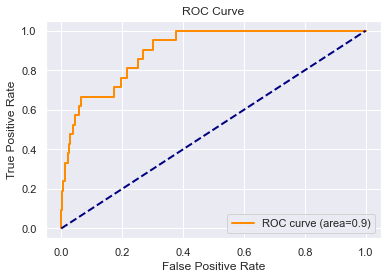

In [89]:
plot_roc(fpr, tpr, auc)

From the graph I chose the point at which the false positive rate was around .3 and the true positive rate was around .97. I thought this was a good threshold because it is better be suspicious of whether a transaction is fradulent than to totally miss it. 

In [98]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp/ (fn+tp)
    fpr = fp / (fp+tn)
    return pd.DataFrame({'threshold':[thresh],
                          'tpr':[tpr],
                           'fpr':[fpr]})

In [108]:
for thresh in np.arange(0,.1,.0001):
    print(tpr_fpr_thresh(df_test['isFraud'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0     0.0001  1.0  0.435407
   threshold  tpr       fpr
0     0.0002  1.0  0.435407
   threshold  tpr       fpr
0     0.0003  1.0  0.375644
   threshold       tpr       fpr
0     0.0004  0.952381  0.374693
   threshold       tpr       fpr
0     0.0005  0.952381  0.362831
   threshold       tpr       fpr
0     0.0006  0.952381  0.326893
   threshold       tpr       fpr
0     0.0007  0.952381  0.303869
   threshold       tpr       fpr
0     0.0008  0.904762  0.281796
   threshold       tpr       fpr
0     0.0009  0.857143  0.264628
   threshold       tpr       fpr
0      0.001  0.809524  0.242655
   threshold       tpr      fpr
0     0.0011  0.809524  0.21908
   threshold       tpr       fpr
0     0.0012  0.761905  0.214725
   threshold       tpr       fpr
0     0.0013  0.761905  0.197107
   threshold       tpr       fpr
0     0.0014  0.714286  0.194454
   threshold       tpr       fpr
0     0.0015  0.714286  0.175

In [109]:
tpr_fpr_thresh(df_test['isFraud'], df_test['phat_test'], .0007)

,threshold,tpr,fpr
0,0.0007,0.952381,0.303869


The true positive rate is .95 and the false positive rate is .30

### Conclusion 

Yes there was a linear relationship between fraud with type and amount, but not much with step. Also, the two big indicators for fradulent transactions were large cash outs and transfers.

## 6. Conclusion

From my findings the larger the transactions are from the cash outs and transfers. It is more likely to be a fradulent transaction. On top of this, the number of hours spent on a transaction can be important information as well. The more hours spent can mean the transaction is fradulent as well. This makes sense because a lot of scams are done through transfers. Also, a lot of cash out payments are made using something stolen. 

For future work, it may be best to investigate more data. If the action was a payment, what was the payment used for? Do we have information on who the money has been transferred to, is their account suspicious? How do we lower the false positivity rate? These would all be great questions to pull from this analysis.
